In [19]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

# 28.2
Feel free to experiment.

Part A.
Notice the form that the matrices take.

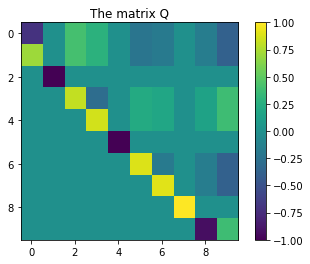

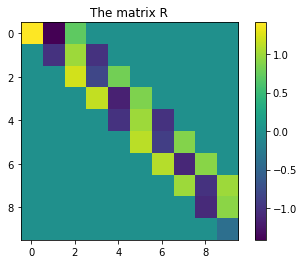

In [16]:
def constructA(n):
    A = np.diag(-np.ones(n))
    A += np.diag(np.ones(n-1),k=1)
    A += np.diag(np.ones(n-1),k=-1)
    return A

A = constructA(10)
Q,R = np.linalg.qr(A)
plt.imshow(Q)
plt.title("The matrix Q")
plt.colorbar()
plt.show()
plt.imshow(R)
plt.colorbar()
plt.title("The matrix R")
plt.show()

Part B.
Reconstructing the tridiagonal form.

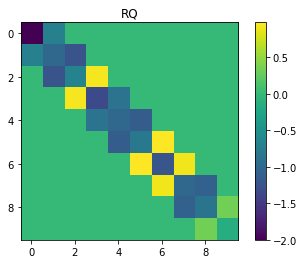

In [17]:
plt.imshow(R.dot(Q))
plt.title("RQ")
plt.colorbar()
plt.show()

# 29.1

In [161]:
def tridiag(A):
    """
    Householder reduction to Hessenberg form.
    INPUT
        A (ndarray) real, symmetric mxm matrix
    RETURNS
        A in tridiagonalized form
        
    """
    m = A.shape[0]
    for k in range(m-2):
        x = A[k+1:m,k].copy()
        v = np.sign(x[0])*np.linalg.norm(x)*np.identity(m-(k+1))[0] + x
        v /= np.linalg.norm(v)
        A[k+1:m,k:m] -= 2*np.outer(v,v).dot(A[k+1:m,k:m])
        A[:m,k+1:m] -= 2*A[:m,k+1:m].dot(np.outer(v,v))
        T = np.diag(np.diag(A)) + np.diag(np.diag(A,k=1),k=1) + np.diag(np.diag(A,k=1),k=-1)
    return A

def qralg(T):
    Q,R = np.linalg.qr(T)

def prog():
    pass

In [162]:
# unit tests
H = la.hilbert(4)
H

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ],
       [ 0.5       ,  0.33333333,  0.25      ,  0.2       ],
       [ 0.33333333,  0.25      ,  0.2       ,  0.16666667],
       [ 0.25      ,  0.2       ,  0.16666667,  0.14285714]])

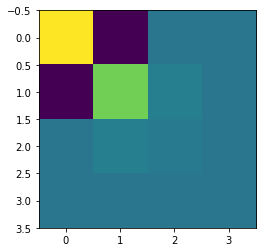

In [163]:
#sign error somewhere
plt.imshow(tridiag(H))
plt.show()

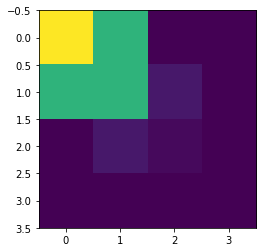

In [164]:
plt.imshow(la.hessenberg(H))
plt.show()